# Defining modified Rankin Scale (mRS) probability distributions for untreated patients, and predicted distributions if treatment given at time of stroke onset

## Plain English Summary

When we predict the outcome of a person who has had a stroke, we want to be able to say what is the likely improvement in disability level they would experience due to the treatment.

Disability levels may be measured in various ways. In this project we are using the modified Rankin Scale (mRS). It is a commonly used scale for measuring the degree of disability or dependence in the daily activities of people who have suffered a stroke.

The scale runs from 0-6, running from perfect health without symptoms to death:

| Score | Description |
|---|---|
| 0 | No symptoms. |
| 1 | No significant disability. Able to carry out all usual activities, despite some symptoms. |
| 2 | Slight disability. Able to look after own affairs without assistance, but unable to carry out all previous activities. |
| 3 | Moderate disability. Requires some help, but able to walk unassisted. |
| 4 | Moderately severe disability. Unable to attend to own bodily needs without assistance, and unable to walk unassisted. |
| 5 | Severe disability. Requires constant nursing care and attention, bedridden, incontinent. |
| 6 | Dead. |

The improvement in disability level they can get will depend on the time from when their stroke symptoms began and when they receive treatment. The best possible outcome would be if they were treated immediately after they had their stroke. The benefit of treatment reduces over time until the treatment no longer offers any benefit, and they will not be better off than having no treatment.

In this notebook we describe how we estimate the spread of disability levels if treatment was given immediately after the stroke (at *t = 0*), and what the spread of disability levels would be if the treatment was given at a time when it was no longer effective (at *t = No Effect*). These are two key pieces of information we will later use to estimate the spread of disability levels if we know the time after stroke symptoms began when a person was treated with either thrombolysis (IVT), a clot-busting medication, or thrombectomy (MT), the physical removal of a clot. The methodology described here is for patients with an ischaemic stroke (a stroke that is caused by a clot), where the location of the clot is either in a large vessel occlusion (LVO), or not (nLVO).

# Method

A more in depth description of the method is found in the document [predicting granular disability outcomes after treatment of stroke with thrombolysis (IVT) or thrombectomy (MT)](./intro.md) 

This model contains mRS outcome distributions for three patient-treatment cohorts: 1) nLVO-IVT (patients with an nLVO that are treated with IVT), 2) LVO-IVT (patients with an LVO that are treated with IVT), 3) LVO-MT (patients with an LVO that are treated with MT). For each patient-treatment cohort, we estimate two mRS distributions: one mRS distribution if treatment is given at *t = 0* (time of stroke onset), and one mRS distribution if treatment is given at *t = No Effect* (time of no effect). In order to estimate these two mRS distributions, we use data from reperfusion treatment clinical trials and stroke admission data from England and Wales (Sentinel Stroke National Audit Programme, SSNAP). To select the relevant patients for each cohort we will use the National Institutes of Health Stroke Scale (NIHSS) on arrival as a surrogate to classify patients as nLVO (NIHSS 0-10) or LVO (NIHSS 11+).

All mRS distributions created are based on the assumption that, following treatment, the mRS distribution will lie between two extremes: 1) reperfusion perfectly restores function, and the resulting mRS distribution is the same as the pre-stroke mRS distribution (this data is obtained from the SSNAP dataset), and 2) reperfusion treatment fails to restore any function and the resulting mRS distribution is the same as a control untreated population, though with added excess deaths that may be caused by the treatment. To create required mRS distributions we find a weighting between these two extremes that give us a distribution that matches published reference points.

The *t = 0* mRS distributions are calculated to give the expected mRS distributions if treatment was given immediately after stroke onset, and also include the risk of excess deaths caused by taking the treatment. Further details specific to stroke type and treatment type are given below.

The *t = No Effect* mRS distributions are based on mRS distribution data when patients did not receive any treatment (this represents what will happen if the patient takes the treatment at *t = No Effect*). This data is obtained from the untreated control group in clinical trials and further adjusted to include the risk of excess deaths caused by taking the treatment. Further details specific to stroke type and treatment type are given below.

From this description it can be seen that for each patient-treatment cohort four pieces of information are required:

1) **pre-stroke mRS distribution** (fully recovered) 
2) **treatment has no effect mRS distribution**
3) **excess deaths** due to treatment 
4) **weights** to combine the two mRS distributions (pre-stroke and no effect) to represent the *t = 0* mRS distribution.

Next we describe how we obtain these four pieces of information for the three patient-treatment cohorts.

1) **Pre-stroke mRS distribution** (fully recovered)

The *pre-stroke mRS distribution* is taken from the SSNAP dataset, extracting the patients that have an ischaemic stroke and using NIHSS 0-10 as a surrogate for nLVO, or NIHSS 11+ as a surrogate for LVO to further extract the relevant patients for each patient-treatment cohort. This mRS distribution is then corrected for the excess deaths due to treatment (see *weights* subsection below for more information).

2) **Treatment has no effect mRS distribution**

* For *nLVO patients* the *no effect mRS distribution* is taken from the untreated control group of combined nLVO/LVO data from Lees et al. 2010, and from that we remove the contribution of the LVO patients by using the results from the untreated control group of LVO-only data from Goyal et al. 2016. Each mRS distribution (Lees, and Goyal) are adjusted to account for the excess deaths due to IVT treatment (using their relevant patient type: nLVO and/or LVO, see *weights* subsection below for more information). The two mRS distributions are then combined, using weightings (154% Lees and -54% Goyal) chosen such that the resulting mRS distribution represents just the nLVO patients and matches the P(mRS <= 1, *t = No Effect"*) of 0.46 (from the control group in Emberson with NIHSS of 0-10).

* For *LVO patients* the *no effect mRS distribution* is taken from the untreated control population from Goyal et al. 2016.  This mRS distribution is then corrected for the excess deaths due to treatment (see *weights* subsection below for more information).

3) **Excess deaths**

All mRS distributions are corrected for the *excess deaths* due to treatment. We use 1.10% for nLVO patients with IVT, 3.41% for LVO patients with IVT, 2.29% for a combination of nLVO/LVO patients with IVT (Emberson et al., 2014), and 3.6% for MT (Goyal et al., 2016). See appendix for more details.

4) **Weights** (for combining the no effect and fully recovered mRS distributions for t = 0)

* For nLVO patients treated with IVT at *t = 0* the *weights* used to combine the two mRS distributions (61% fully recovered & 39% no effect) were informed by data from Emberson et al. 2014, and found in order to match the P(mRS <= 1, t=0) of 0.63. 46% of patients with NIHSS 0-10 had mRS 0-1 in the untreated group (see figure 2 Emberson et al. 2014). Translated into a odds of a good outcome (0.85), and multipied with the odds ratio for mRS 0-1 at *t = 0* (which is 2.0, obtained from extrapolating back to *t = 0* in figure 1 Emberson et al. 2014), gives a probability of 63%.

* For LVO patients treated with IVT at *t = 0* the *weights* used to combine these two mRS distributions (18% fully recovered & 82% no effect) are chosen to match predicted P(mRS <= 1, t=0) of 0.20, which is set as a target by extrapolating the control group mRS for patients with NIHSS 11+ from Emberson et al. 2014 back to a predicted odds ratio of mRS 0-1 of 2.0 at *t = 0*.

* For LVO patients treated with MT at *t = 0* the *weights* used to combine these two mRS distributions (75% fully recovered & 25% no effect) are taken from Hui et al. 2020, who reported 75% successful recanalisation with thrombectomy. We assume that recanalisation at t=0 restores all pre-stroke function*. 

\*Extrapolating results of good outcome, when recanalisation has been achieved with MT, from Fransen et al. 2016 back to *t = 0*, assuming 75% recanalisation, gives the same proportion of patients with mRS <= 2 as the pre-stroke mRS in the SSNAP data (therefore this extrapolation would suggest full recovery of all health with MT theoretically carried out at *t = 0*).

Note: Also calculated in this notebook, and stored for future use, are the **no treatment mRS distributions** that are used as the control populations: 1) nLVO without treatment; 2) LVO without treatment.

* For *nLVO patients* the *no treatment mRS distribution* is taken from the untreated control group of combined nLVO/LVO data from Lees et al. 2010, and from that we remove the contribution of the LVO patients by using the results from the untreated control group of LVO-only data from Goyal et al. 2016. Weightings for these two untreated control groups (146% Lees and -46% Goyal) are chosen such that the resulting mRS distribution represents just the nLVO patients and matches the P(mRS <= 1, *t = No Effect"*) of 0.46 (from the control group in Emberson with NIHSS of 0-10).

* For *LVO patients* the *no treatment mRS distribution* is taken from the untreated control population from Goyal et al. 2016.

# The code

Now we will show the code to calculate the mRS distributions that we have explained above.

## Import packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Set NumPy and Pandas to print 4 decimal places
np.set_printoptions(precision=4)
pd.set_option("display.precision", 4)

## Set up dictionaries for results

In [2]:
all_distributions_bins = dict()
all_distributions_cumsum = dict()

## Pre-stroke mRS distribution (fully recovered)

Use the pre-stroke mRS distributions from SSNAP data to estimate the best possible outcome from treatment.

### Pre-stroke mRS distribution for nLVO patients

In [3]:
# Pre-stroke nLVO uses pre-stroke mRS from SSNAP for patients with ischaemic
# stroke and NIHSS 0-10.

# Define distribution from SSNAP data
pre_stroke_nlvo_bins = np.array([
    0.582881, 0.162538, 0.103440, 0.102223, 0.041973, 0.006945, 0.0])

# Normalise
pre_stroke_nlvo_bins = pre_stroke_nlvo_bins /np.sum(pre_stroke_nlvo_bins)
all_distributions_bins['pre_stroke_nlvo'] = pre_stroke_nlvo_bins

# Make cumulative distribution
pre_stroke_nlvo_cumsum = np.cumsum(pre_stroke_nlvo_bins)
all_distributions_cumsum['pre_stroke_nlvo'] = pre_stroke_nlvo_cumsum

# Show
print('Pre-stroke nLVO')
print('---------------')
print('mRS bins:')
print(repr(pre_stroke_nlvo_bins))
print()
print('mRS cumulative:')
print(repr(pre_stroke_nlvo_cumsum))

Pre-stroke nLVO
---------------
mRS bins:
array([0.5829, 0.1625, 0.1034, 0.1022, 0.042 , 0.0069, 0.    ])

mRS cumulative:
array([0.5829, 0.7454, 0.8489, 0.9511, 0.9931, 1.    , 1.    ])


#### Add IVT extra deaths (to pre-stroke nLVO patients)
The distribution is corrected for 1.1% excess deaths in the IVT-treated group (from Emberson et al., 2014, using NIHSS 0-10 as a surrogate for nLVO).

In [4]:
# Take a copy of the mRS distribution for nLVO pre-stroke
pre_stroke_nlvo_bins_ivt_deaths = np.copy(pre_stroke_nlvo_bins)

# Adjust deaths to include the 1.10% excess that are due to haemorrhage from use 
# of IVT in nLVO patents (Emberson et al., 2014)
excess_deaths = 0.011
pre_stroke_nlvo_bins_ivt_deaths[6] += excess_deaths
correction_mrs_0_to_5 = (
    (np.sum(pre_stroke_nlvo_bins_ivt_deaths[0:6]) - excess_deaths) / 
    (np.sum(pre_stroke_nlvo_bins_ivt_deaths[0:6])))
pre_stroke_nlvo_bins_ivt_deaths[0:6] *= correction_mrs_0_to_5
pre_stroke_nlvo_cumsum_ivt_deaths = np.cumsum(pre_stroke_nlvo_bins_ivt_deaths)

# Store
all_distributions_bins['pre_stroke_nlvo_ivt_deaths'] = \
    pre_stroke_nlvo_bins_ivt_deaths
all_distributions_cumsum['pre_stroke_nlvo_ivt_deaths'] = \
    pre_stroke_nlvo_cumsum_ivt_deaths

# Show
print('Pre-stroke nLVO with IVT deaths')
print('-------------------------------')
print('mRS bins:')
print(repr(pre_stroke_nlvo_bins_ivt_deaths))
print()
print('mRS cumulative:')
print(repr(pre_stroke_nlvo_cumsum_ivt_deaths))

Pre-stroke nLVO with IVT deaths
-------------------------------
mRS bins:
array([0.5765, 0.1608, 0.1023, 0.1011, 0.0415, 0.0069, 0.011 ])

mRS cumulative:
array([0.5765, 0.7372, 0.8395, 0.9406, 0.9821, 0.989 , 1.    ])


### LVO pre-stroke mRS distribution

In [5]:
# Pre-stroke nLVO uses pre-stroke mRS from SSNAP for patients with ischaemic
# stroke and NIHSS 0-10.

# Define distribution from SSNAP data
pre_stroke_lvo_bins = np.array([
    0.417894, 0.142959, 0.118430, 0.164211, 0.113775, 0.042731, 0.0])

# Normalise
pre_stroke_lvo_bins = pre_stroke_lvo_bins /np.sum(pre_stroke_lvo_bins)
all_distributions_bins['pre_stroke_lvo'] = pre_stroke_lvo_bins

# Make cumulative distribution
pre_stroke_lvo_cumsum = np.cumsum(pre_stroke_lvo_bins)
all_distributions_cumsum['pre_stroke_lvo'] = pre_stroke_lvo_cumsum

# Show
print('Pre-stroke LVO')
print('--------------')
print('mRS bins:')
print(repr(pre_stroke_lvo_bins))
print()
print('mRS cumulative:')
print(repr(pre_stroke_lvo_cumsum))

Pre-stroke LVO
--------------
mRS bins:
array([0.4179, 0.143 , 0.1184, 0.1642, 0.1138, 0.0427, 0.    ])

mRS cumulative:
array([0.4179, 0.5609, 0.6793, 0.8435, 0.9573, 1.    , 1.    ])


#### Add IVT extra deaths (to pre-stroke LVO patients)
The distribution is corrected for 3.41% excess deaths in the IVT-treated group (from Emberson et al., 2014, using NIHSS 11+ as a surrogate for LVO).

In [6]:
# Take a copy of the mRS distribution for LVO pre-stroke
pre_stroke_lvo_bins_ivt_deaths = np.copy(pre_stroke_lvo_bins)

# Adjust deaths to include the 3.41% excess that are due to haemorrhage from use 
# of IVT in LVO patents (Emberson et al., 2014)
excess_deaths = 0.0341
pre_stroke_lvo_bins_ivt_deaths[6] += excess_deaths
correction_mrs_0_to_5 = (
    (np.sum(pre_stroke_lvo_bins_ivt_deaths[0:6]) - excess_deaths) / 
    (np.sum(pre_stroke_lvo_bins_ivt_deaths[0:6])))
pre_stroke_lvo_bins_ivt_deaths[0:6] *= correction_mrs_0_to_5
pre_stroke_lvo_cumsum_ivt_deaths = np.cumsum(pre_stroke_lvo_bins_ivt_deaths)

# Store
all_distributions_bins['pre_stroke_lvo_ivt_deaths'] = \
    pre_stroke_lvo_bins_ivt_deaths
all_distributions_cumsum['pre_stroke_lvo_ivt_deaths'] = \
    pre_stroke_lvo_cumsum_ivt_deaths

# Show
print('Pre-stroke lvo with IVT deaths')
print('------------------------------')
print('mRS bins:')
print(repr(pre_stroke_lvo_bins_ivt_deaths))
print()
print('mRS cumulative:')
print(repr(pre_stroke_lvo_cumsum_ivt_deaths))

Pre-stroke lvo with IVT deaths
------------------------------
mRS bins:
array([0.4036, 0.1381, 0.1144, 0.1586, 0.1099, 0.0413, 0.0341])

mRS cumulative:
array([0.4036, 0.5417, 0.6561, 0.8147, 0.9246, 0.9659, 1.    ])


#### Add MT extra deaths (to pre-stroke LVO patients)
The distribution is corrected for 3.6% excess deaths in the MT-treated group (Goyal et al., 2016). These already include excess deaths from any use of IVT first.

In [7]:
# Take a copy of the mRS distribution for LVO pre-stroke
pre_stroke_lvo_bins_mt_deaths = np.copy(pre_stroke_lvo_bins)

# Adjust deaths to include the 3.6% excess due use of MT (Goyal et al., 2016).
excess_deaths = 0.036
pre_stroke_lvo_bins_mt_deaths[6] += excess_deaths
correction_mrs_0_to_5 = (
    (np.sum(pre_stroke_lvo_bins_mt_deaths[0:6]) - excess_deaths) / 
    (np.sum(pre_stroke_lvo_bins_mt_deaths[0:6])))
pre_stroke_lvo_bins_mt_deaths[0:6] *= correction_mrs_0_to_5
pre_stroke_lvo_cumsum_mt_deaths = np.cumsum(pre_stroke_lvo_bins_mt_deaths)

# Store
all_distributions_bins['pre_stroke_lvo_mt_deaths'] = \
    pre_stroke_lvo_bins_mt_deaths
all_distributions_cumsum['pre_stroke_lvo_mt_deaths'] = \
    pre_stroke_lvo_cumsum_mt_deaths

# Show
print('Pre-stroke lvo with mt deaths')
print('-----------------------------')
print('mRS bins:')
print(repr(pre_stroke_lvo_bins_mt_deaths))
print()
print('mRS cumulative:')
print(repr(pre_stroke_lvo_cumsum_mt_deaths))

Pre-stroke lvo with mt deaths
-----------------------------
mRS bins:
array([0.4028, 0.1378, 0.1142, 0.1583, 0.1097, 0.0412, 0.036 ])

mRS cumulative:
array([0.4028, 0.5407, 0.6548, 0.8131, 0.9228, 0.964 , 1.    ])


## Treatment has no effect mRS distribution: nLVO patients with IVT

This mRS distribution is taken from the untreated control group of combined nLVO/LVO data from Lees et al. 2010, and from that we remove the contribution of the LVO patients by using the results from the untreated control group of LVO-only data from Goyal et al. 2016. Weightings for these two untreated control groups (149% Lees and -49% Goyal) are chosen such that the resulting mRS distribution to represent just the nLVO patients matches the P(mRS <= 1, *t = No Effect"*) of 0.46 (from the control group in Emberson with NIHSS of 0-10). 

Before the two individual mRS distributions are combined, they are each corrected for the excess deaths due to IVT treatment. For nLVO patients this is 1.10%, and for LVO patients this is 3.41% (see appendix).

Set up required distributions from data.

In [8]:
# Define distribution from Lees et al. 2010
no_treatment_nlvo_lvo_bins = np.array(
    [0.1486, 0.2022, 0.1253, 0.1397, 0.1806, 0.0861, 0.1175])

# Define distribution from Goyal et al. 2016
no_treatment_lvo_bins = np.array(
    [0.050, 0.079, 0.136, 0.164, 0.247, 0.135, 0.189])

# Normalise
no_treatment_nlvo_lvo_bins = (
    no_treatment_nlvo_lvo_bins / np.sum(no_treatment_nlvo_lvo_bins))

no_treatment_lvo_bins = (
    no_treatment_lvo_bins / np.sum(no_treatment_lvo_bins))

# Make cumulative distribution
no_treatment_nlvo_lvo_cumsum = np.cumsum(no_treatment_nlvo_lvo_bins)
no_treatment_lvo_cumsum = np.cumsum(no_treatment_lvo_bins)

# Show
print('nLVO-LVO combined no treatment effect')
print('-------------------------------------')
print('mRS bins:')
print(repr(no_treatment_nlvo_lvo_bins))
print()
print('mRS cumulative:')
print(repr(no_treatment_nlvo_lvo_cumsum))
print()
print('LVO combined no treatment effect')
print('-------------------------------------')
print('mRS bins:')
print(repr(no_treatment_lvo_bins))
print()
print('mRS cumulative:')
print(repr(no_treatment_lvo_cumsum))

nLVO-LVO combined no treatment effect
-------------------------------------
mRS bins:
array([0.1486, 0.2022, 0.1253, 0.1397, 0.1806, 0.0861, 0.1175])

mRS cumulative:
array([0.1486, 0.3508, 0.4761, 0.6158, 0.7964, 0.8825, 1.    ])

LVO combined no treatment effect
-------------------------------------
mRS bins:
array([0.05 , 0.079, 0.136, 0.164, 0.247, 0.135, 0.189])

mRS cumulative:
array([0.05 , 0.129, 0.265, 0.429, 0.676, 0.811, 1.   ])


### Add IVT extra deaths (for Lees untreated control group, combined nLVO/LVO)
The distribution is corrected for excess deaths in the IVT-treated group (from Emberson et al., 2014). We use 1.10% for nLVO (using NIHSS 11+ as a surrogate for LVO), and 3.41% for LVO (using NIHSS 11 as a surrogate for LVO).

In [9]:
# Take a copy of the mRS distribution for Lees untreated control group (n/LVO)
no_treatment_nlvo_lvo_bins_ivt_deaths = np.copy(no_treatment_nlvo_lvo_bins)

# Adjust deaths to include the 2.29% excess due to haemorrhage from use of IVT
excess_deaths = 0.0229
no_treatment_nlvo_lvo_bins_ivt_deaths[6] += excess_deaths
correction_mrs_0_to_5 = (
    (np.sum(no_treatment_nlvo_lvo_bins_ivt_deaths[0:6]) - excess_deaths) / 
    (np.sum(no_treatment_nlvo_lvo_bins_ivt_deaths[0:6])))
no_treatment_nlvo_lvo_bins_ivt_deaths[0:6] *= correction_mrs_0_to_5
no_treatment_nlvo_lvo_cumsum_ivt_deaths = (
                            np.cumsum(no_treatment_nlvo_lvo_bins_ivt_deaths))

# Show
print('No treatment combined nlvo/lvo with IVT deaths')
print('----------------------------------------------')
print('mRS bins:')
print(repr(no_treatment_nlvo_lvo_bins_ivt_deaths))
print()
print('mRS cumulative:')
print(repr(no_treatment_nlvo_lvo_cumsum_ivt_deaths))

No treatment combined nlvo/lvo with IVT deaths
----------------------------------------------
mRS bins:
array([0.1447, 0.197 , 0.122 , 0.1361, 0.1759, 0.0839, 0.1404])

mRS cumulative:
array([0.1447, 0.3417, 0.4637, 0.5998, 0.7757, 0.8596, 1.    ])


### Add IVT extra deaths (for Goyal's untreated control group, LVO)
The distribution is corrected for 3.41% excess deaths in the IVT-treated group (from Emberson et al., 2014, using NIHSS 11+ as a surrogate for LVO).

In [10]:
# Take a copy of the mRS distribution for Goyals untreated control group (LVO)
no_treatment_lvo_bins_ivt_deaths = np.copy(no_treatment_lvo_bins)

# Adjust deaths to include the 3.41% excess due to haemorrhage from use of IVT
excess_deaths = 0.0341
no_treatment_lvo_bins_ivt_deaths[6] += excess_deaths
correction_mrs_0_to_5 = (
    (np.sum(no_treatment_lvo_bins_ivt_deaths[0:6]) - excess_deaths) / 
    (np.sum(no_treatment_lvo_bins_ivt_deaths[0:6])))
no_treatment_lvo_bins_ivt_deaths[0:6] *= correction_mrs_0_to_5
no_treatment_lvo_cumsum_ivt_deaths = np.cumsum(no_treatment_lvo_bins_ivt_deaths)

# Show
print('No treatment combined lvo with IVT deaths')
print('-----------------------------------------')
print('mRS bins:')
print(repr(no_treatment_lvo_bins_ivt_deaths))
print()
print('mRS cumulative:')
print(repr(no_treatment_lvo_cumsum_ivt_deaths))

No treatment combined lvo with IVT deaths
-----------------------------------------
mRS bins:
array([0.0479, 0.0757, 0.1303, 0.1571, 0.2366, 0.1293, 0.2231])

mRS cumulative:
array([0.0479, 0.1236, 0.2539, 0.411 , 0.6476, 0.7769, 1.    ])


### Calculate a weighted distribution of LVO and nLVO

We want an untreated control group containing nLVO patients to use as our mRS distribution to represent when IVT treatment has no effect on nLVO patients. Using the two untreated control groups (nLVO/LVO from Lees, and LVO from Goyal) calculate the weights needed to remove the effect of the LVO patients from Lees, that also gives a mRS distribution with P(mRS <= 1, *t = No Effect*) = 46% (Emberson et al. 2014).

#### Calculate weights without excess IVT deaths
This is used to get the mRS distribution for nLVO patients who had no treatment (the control nLVO population). This mRS distribution is not used in this notebook, but is stored to be used in later notebooks.

In [11]:
# Calculate the difference between the target of P(mRS<=1,t=No Effect)=0.46 for  
#   nLVO and the no treatment combined nLVO/LVO P(mRS<=1)
target_diff = 0.46 - no_treatment_nlvo_lvo_cumsum[1]

# Calculate the known current difference between the no treatment LVO P(mRS<=1) 
#   and the combined nLVO/LVO P(mRS<=1) 
current_diff = (no_treatment_lvo_cumsum[1] - no_treatment_nlvo_lvo_cumsum[1])

# The weight attributable to LVO is the target difference / the current 
#   difference
weight_lvo = target_diff / current_diff

# The weight attributable to nLVO is (1 - the weight attributable to LVO)
weight_nlvo_lvo = 1.0 - weight_lvo

print(f'Weights (Lee, Goyal): {weight_nlvo_lvo:.4f},', f'{weight_lvo:.4f}')

Weights (Lee, Goyal): 1.4923, -0.4923


Apply the weights

In [12]:
# Apply weights
no_treatment_nlvo_bins = (
    (weight_nlvo_lvo * no_treatment_nlvo_lvo_bins) + 
    (weight_lvo * no_treatment_lvo_bins))

# Normalise
no_treatment_nlvo_bins = (
    no_treatment_nlvo_bins / np.sum(no_treatment_nlvo_bins))

# Make cumulative distribution (before correction for deaths)
no_treatment_nlvo_cumsum = np.cumsum(no_treatment_nlvo_bins)

# Copy, to add trteament deaths
no_effect_nlvo_ivt_bins = np.copy(no_treatment_nlvo_bins)

# Store
all_distributions_bins['no_treatment_nlvo'] = no_effect_nlvo_ivt_bins

# Make cumulative distribution
no_effect_nlvo_cumsum = np.cumsum(no_effect_nlvo_ivt_bins)
all_distributions_cumsum['no_treatment_nlvo'] = no_effect_nlvo_cumsum

# Show
print('nLVO no treatment effect')
print('------------------------')
print('mRS bins:')
print(repr(no_effect_nlvo_ivt_bins))
print()
print('mRS cumulative:')
print(repr(no_effect_nlvo_cumsum))

nLVO no treatment effect
------------------------
mRS bins:
array([0.1971, 0.2629, 0.12  , 0.1277, 0.1479, 0.062 , 0.0823])

mRS cumulative:
array([0.1971, 0.46  , 0.58  , 0.7078, 0.8557, 0.9177, 1.    ])


#### Calculate weights with excess IVT deaths

This is used to get the mRS distribution for nLVO patients who had IVT treatment at *t = No Effect* (this is for the patient-treatment cohort nLVO-IVT).

Note: We use the mRS distributions for no treatment with excess IVT deaths to represent the outcome of having treatment at *t = No Effect*.

In [13]:
# Calculate the difference between the target of P(mRS<=1,t=No Effect)=0.46 for 
#   nLVO and the no treatment combined nLVO/LVO P(mRS<=1) with excess IVT deaths
target_diff = 0.46 - no_treatment_nlvo_lvo_cumsum_ivt_deaths[1]

# Calculate the known current difference between the no treatment LVO 
#   P(mRS<=1,t=No Effect) and the combined nLVO/LVO P(mRS<=1), both with 
#   excess IVT deaths 
current_diff = (no_treatment_lvo_cumsum_ivt_deaths[1] - 
                no_treatment_nlvo_lvo_cumsum_ivt_deaths[1])

# The weight attributable to LVO is the target difference / the current 
#   difference
weight_lvo = target_diff / current_diff


weight_nlvo_lvo = 1.0 - weight_lvo

print(f'Weights (Lee, Goyal): {weight_nlvo_lvo:.4f},', f'{weight_lvo:.4f}')

Weights (Lee, Goyal): 1.5424, -0.5424


Apply the weights

In [14]:
# Apply weights
no_treatment_nlvo_bins_ivt_deaths = (
    (weight_nlvo_lvo * no_treatment_nlvo_lvo_bins_ivt_deaths) + 
    (weight_lvo * no_treatment_lvo_bins_ivt_deaths))

# Normalise
no_treatment_nlvo_bins_ivt_deaths = (no_treatment_nlvo_bins_ivt_deaths / 
                                     np.sum(no_treatment_nlvo_bins_ivt_deaths))

# Make cumulative distribution (before correction for deaths)
no_treatment_nlvo_cumsum_ivt_deaths = \
    np.cumsum(no_treatment_nlvo_bins_ivt_deaths)

# Copy, to add treatment deaths
no_effect_nlvo_ivt_bins_ivt_deaths = np.copy(no_treatment_nlvo_bins_ivt_deaths)

# Store
all_distributions_bins['no_effect_nlvo_ivt_deaths'] = \
    no_effect_nlvo_ivt_bins_ivt_deaths

# Make cumulative distribution
no_effect_nlvo_cumsum_ivt_deaths = np.cumsum(no_treatment_nlvo_bins_ivt_deaths)
all_distributions_cumsum['no_effect_nlvo_ivt_deaths'] = \
    no_effect_nlvo_cumsum_ivt_deaths

# Show
print('nLVO no treatment effect_ivt_deaths')
print('-----------------------------------')
print('mRS bins:')
print(repr(no_effect_nlvo_ivt_bins_ivt_deaths))
print()
print('mRS cumulative:')
print(repr(no_effect_nlvo_cumsum_ivt_deaths))

nLVO no treatment effect_ivt_deaths
-----------------------------------
mRS bins:
array([0.1973, 0.2627, 0.1176, 0.1247, 0.143 , 0.0592, 0.0955])

mRS cumulative:
array([0.1973, 0.46  , 0.5776, 0.7023, 0.8452, 0.9045, 1.    ])


### mRS distribution at *t = 0* for nLVO patients with IVT

We now have the two mRS distributions (fully recovered, and no effect) to calculate the mRS distribution for nLVO patients recieving IVT at *t = 0*.

The weights used to combine these two mRS distribution (61% fully recovered & 39% no effect) were informed by data from Emberson et al. 2014, and found in order to match the P(mRS <= 1, *t = 0*) of 0.63. 63% is estimated from Emberson et al. 2014, where 46% of untreated patients with NIHSS 0-10 had mRS 0-1, and the odds ratio of mRS 0-1 extrapolates back to 2.0 at *t = 0*.

Note 1: We use the mRS distributions for no treatment adjusted with excess IVT deaths to represent the outcome of having treatment at *t = No Effect*.\
Note 2: We use the mRS distributions for pre-stroke adjusted with excess IVT deaths to represent the outcome of having a full recovery with treatment at *t = 0*.

Calculate weights.

In [15]:
# Calculate the difference between the target of P(mRS<=1,t=0)=0.63 for nLVO
#   and the no treatment combined nLVO/LVO P(mRS<=1) with excess IVT deaths
target_diff  = 0.63 - no_treatment_nlvo_cumsum_ivt_deaths[1]

# Calculate the known current difference between pre-stroke nLVO P(mRS<=1) and  
#   the no treatment nLVO P(mRS<=1), both with excess IVT deaths 
current_diff = (pre_stroke_nlvo_cumsum_ivt_deaths[1] - 
                no_treatment_nlvo_cumsum_ivt_deaths[1])

# The weight attributable to pre-stroke is the target difference / the current 
#   difference
weight_pre_stroke_nlvo = target_diff / current_diff

# The weight attributable to no treatment is (1 - the weight attributable to 
#   pre-stroke)
weight_no_treatment_nlvo = 1.0 - weight_pre_stroke_nlvo

print(f'Weights (pre-stroke, no treatment): {weight_pre_stroke_nlvo:.4f},',
      f'{weight_no_treatment_nlvo:.4f}')

Weights (pre-stroke, no treatment): 0.6132, 0.3868


Apply the weights.

In [16]:
# Apply weights
t0_treatment_nlvo_ivt_bins = (
    (weight_pre_stroke_nlvo * pre_stroke_nlvo_bins_ivt_deaths) +
    (weight_no_treatment_nlvo * no_treatment_nlvo_bins_ivt_deaths))

# Normalise
t0_treatment_nlvo_ivt_bins = (
    t0_treatment_nlvo_ivt_bins / np.sum(t0_treatment_nlvo_ivt_bins))

# Store
all_distributions_bins['t0_treatment_nlvo_ivt'] = t0_treatment_nlvo_ivt_bins

# Make cumulative distribution
t0_treatment_nlvo_ivt_cumsum = np.cumsum(t0_treatment_nlvo_ivt_bins)
all_distributions_cumsum['t0_treatment_nlvo_ivt'] = t0_treatment_nlvo_ivt_cumsum

# Show
print('nLVO IVT t0 treatment effect')
print('----------------------------')
print('mRS bins:')
print(repr(t0_treatment_nlvo_ivt_bins))
print()
print('mRS cumulative:')
print(repr(t0_treatment_nlvo_ivt_cumsum))

nLVO IVT t0 treatment effect
----------------------------
mRS bins:
array([0.4298, 0.2002, 0.1082, 0.1102, 0.0808, 0.0271, 0.0437])

mRS cumulative:
array([0.4298, 0.63  , 0.7382, 0.8484, 0.9292, 0.9563, 1.    ])


## Treatment has no effect mRS distribution: LVO patients with IVT or MT

For *LVO patients* the *no effect mRS distribution* is taken from the untreated control population from Goyal et al. 2016.  

This mRS distribution is then corrected for the excess deaths due to treatment.  We use 3.41% for LVO patients with IVT (Emberson et al., 2014), and 3.6% for MT (Goyal et al., 2016). No correction for IVT-related deaths is needed when LVO is treated with MT as the Goyal control group includes use of IVT.

In [17]:
# Store (mRS distribution for LVO no treatment, Goyal. Calculated in cell 8)
all_distributions_bins['no_treatment_lvo'] = no_treatment_lvo_bins
all_distributions_cumsum['no_treatment_lvo'] = no_treatment_lvo_cumsum

# Show
print('LVO no treatment effect')
print('------------------------')
print('mRS bins:')
print(repr(no_treatment_lvo_bins))
print()
print('mRS cumulative:')
print(repr(no_treatment_lvo_cumsum))

LVO no treatment effect
------------------------
mRS bins:
array([0.05 , 0.079, 0.136, 0.164, 0.247, 0.135, 0.189])

mRS cumulative:
array([0.05 , 0.129, 0.265, 0.429, 0.676, 0.811, 1.   ])


### Add IVT extra deaths (for Goyals untreated control group, LVO)
The distribution is corrected for 3.41% excess deaths in the IVT-treated group (from Emberson et al., 2014, using NIHSS 11+ as a surrogate for LVO).

In [18]:
# Store (mRS distribution for LVO no treatment with IVT excess deaths, Goyal)
all_distributions_bins['no_effect_lvo_ivt_deaths'] = \
    no_treatment_lvo_bins_ivt_deaths
all_distributions_cumsum['no_effect_lvo_ivt_deaths'] = \
    no_treatment_lvo_cumsum_ivt_deaths

# Show
print('LVO no treatment effect IVT deaths')
print('----------------------------------')
print('mRS bins:')
print(repr(no_treatment_lvo_bins_ivt_deaths))
print()
print('mRS cumulative:')
print(repr(no_treatment_lvo_cumsum_ivt_deaths))

LVO no treatment effect IVT deaths
----------------------------------
mRS bins:
array([0.0479, 0.0757, 0.1303, 0.1571, 0.2366, 0.1293, 0.2231])

mRS cumulative:
array([0.0479, 0.1236, 0.2539, 0.411 , 0.6476, 0.7769, 1.    ])


### Add MT extra deaths (for Goyals untreated control group, LVO)
The distribution is corrected for 3.6% excess deaths in the MT-treated group (Goyal et al., 2016). These already include excess deaths from any use of IVT first.

In [19]:
# Take copy of mRS distribution for LVO patients with no treatment
no_treatment_lvo_bins_mt_deaths = np.copy(no_treatment_lvo_bins)

# Adjust deaths to include the 3.6% excess due use of MT (Goyal et al., 2016).
excess_deaths = 0.036
no_treatment_lvo_bins_mt_deaths[6] += excess_deaths
correction_mrs_0_to_5 = (
    (np.sum(no_treatment_lvo_bins_mt_deaths[0:6]) - excess_deaths) / 
    (np.sum(no_treatment_lvo_bins_mt_deaths[0:6])))
no_treatment_lvo_bins_mt_deaths[0:6] *= correction_mrs_0_to_5
no_treatment_lvo_cumsum_mt_deaths = np.cumsum(no_treatment_lvo_bins_mt_deaths)

# Store
all_distributions_bins['no_effect_lvo_mt_deaths'] = \
    no_treatment_lvo_bins_mt_deaths
all_distributions_cumsum['no_effect_lvo_mt_deaths'] = \
    no_treatment_lvo_cumsum_mt_deaths

# Show
print('LVO no treatment effect MT deaths')
print('----------------------------------')
print('mRS bins:')
print(repr(no_treatment_lvo_bins_mt_deaths))
print()
print('mRS cumulative:')
print(repr(no_treatment_lvo_cumsum_mt_deaths))

LVO no treatment effect MT deaths
----------------------------------
mRS bins:
array([0.0478, 0.0755, 0.13  , 0.1567, 0.236 , 0.129 , 0.225 ])

mRS cumulative:
array([0.0478, 0.1233, 0.2532, 0.41  , 0.646 , 0.775 , 1.    ])


### mRS distribution at *t = 0* for LVO patients with IVT

We now have the two mRS distributions (fully recovered, and no effect) to calculate the mRS distribution for LVO patients recieving IVT at *t = 0*.

The weights used to combine the two mRS distribution (18% fully recovered & 82% no effect) were informed by data from Emberson et al. 2014, and found in order to match the P(mRS <= 1, t = 0) of 0.20, which is set as a target by extrapolating the control group mRS for patients with NIHSS 11+ back to a predicted odds ratio of mRS 0-1 of 2.0 at *t = 0*.

Calculate the weights needed to give a distribution with P(mRS <= 1, t = 0) = 20%.

Note 1: We use the mRS distributions for no treatment adjusted with excess IVT deaths to represent the outcome of having treatment at *t = No Effect*.\
Note 2: We use the mRS distributions for pre-stroke adjusted with excess IVT deaths to represent the outcome of having a full recovery with treatment at *t = 0*.

In [20]:
# Calculate the difference between the target of P(mRS<=1)=0.20 for LVO and the 
#   pre-stroke LVO P(mRS<=1) with excess IVT deaths
target_diff = 0.20 - pre_stroke_lvo_cumsum_ivt_deaths[1]

# Calculate the known current difference between the no treatment LVO P(mRS<=1) 
#   and the pre-stroke LVO P(mRS<=1), both with excess IVT deaths
current_diff = (no_treatment_lvo_cumsum_ivt_deaths[1] - 
                pre_stroke_lvo_cumsum_ivt_deaths[1])

# The weight attributable to no treatment LVO is the target difference / the 
#   current difference
weight_no_treatment_lvo = target_diff / current_diff

# The weight attributable to pre-stroke LVO is (1 - the weight attributable to
#   no treatment LVO
weight_pre_stroke_lvo = 1.0 - weight_no_treatment_lvo

print(
    f'Weights (pre-stroke, no_treatment): {weight_pre_stroke_lvo:.4f},', \
    f'{weight_no_treatment_lvo:.4f}')

Weights (pre-stroke, no_treatment): 0.1828, 0.8172


Apply the weights.

In [21]:
# Apply weights
t0_treatment_lvo_ivt_bins = (
    (weight_pre_stroke_lvo * pre_stroke_lvo_bins_ivt_deaths) +
    (weight_no_treatment_lvo * no_treatment_lvo_bins_ivt_deaths))

# Normalise
t0_treatment_lvo_ivt_bins = (
    t0_treatment_lvo_ivt_bins / np.sum(t0_treatment_lvo_ivt_bins))

all_distributions_bins['t0_treatment_lvo_ivt'] = t0_treatment_lvo_ivt_bins

# Make cumulative distribution
t0_treatment_lvo_ivt_cumsum = np.cumsum(t0_treatment_lvo_ivt_bins)
all_distributions_cumsum['t0_treatment_lvo_ivt'] = t0_treatment_lvo_ivt_cumsum

# Show
print('LVO t0 IVT treatment effect')
print('---------------------------')
print('mRS bins:')
print(repr(t0_treatment_lvo_ivt_bins))
print()
print('mRS cumulative:')
print(repr(t0_treatment_lvo_ivt_cumsum))

LVO t0 IVT treatment effect
---------------------------
mRS bins:
array([0.1129, 0.0871, 0.1274, 0.1574, 0.2135, 0.1132, 0.1886])

mRS cumulative:
array([0.1129, 0.2   , 0.3274, 0.4848, 0.6982, 0.8114, 1.    ])


## mRS distribution at *t = 0* for LVO patients with MT

We now have the two mRS distributions (fully recovered, and no effect) to calculate the mRS distribution for LVO patients recieving MT at *t = 0*.

The weights used to combine the two mRS distribution (75% fully recovered & 25% no effect) are taken from Hui et al. 2020, who reported 75% successful recanalisation with thrombectomy. We assume that recanalisation at *t = 0* restores all pre-stroke function*.

*Extrapolating results of good outcome, when recanalisation has been achieved with thrombectomy, from Fransen et al. 2016 back to t = 0, assuming 75% recanalisation, gives the same proportion of patients with mRS <= 2 as the pre-stroke mRS in the SSNAP data (therefore this extrapolation would suggest full recovery of all health with thrombectomy theoretically carried out at t = 0).

In [22]:
weight_pre_stroke_lvo = 0.75
weight_no_treatment_lvo = 1.0 - weight_pre_stroke_lvo

print(f'Weights (pre-stroke, no treatment): {weight_pre_stroke_lvo:.4f},' \
      f'{weight_no_treatment_lvo:.4f}')

Weights (pre-stroke, no treatment): 0.7500,0.2500


Apply the weights

In [23]:
# Apply weights
t0_treatment_lvo_mt_bins = (
    (weight_pre_stroke_lvo * pre_stroke_lvo_bins_mt_deaths) +
    (weight_no_treatment_lvo * no_treatment_lvo_bins_mt_deaths))

# Normalise
t0_treatment_lvo_mt_bins = (
    t0_treatment_lvo_mt_bins / np.sum(t0_treatment_lvo_mt_bins))
all_distributions_bins['t0_treatment_lvo_mt'] = t0_treatment_lvo_mt_bins

# Make cumulative distribution
t0_treatment_lvo_mt_cumsum = np.cumsum(t0_treatment_lvo_mt_bins)
all_distributions_cumsum['t0_treatment_lvo_mt'] = t0_treatment_lvo_mt_cumsum

# Show
print('LVO MT t0 treatment effect')
print('--------------------------')
print('mRS bins:')
print(repr(t0_treatment_lvo_mt_bins))
print()
print('mRS cumulative:')
print(repr(t0_treatment_lvo_mt_cumsum))

LVO MT t0 treatment effect
--------------------------
mRS bins:
array([0.3141, 0.1222, 0.1181, 0.1579, 0.1413, 0.0631, 0.0832])

mRS cumulative:
array([0.3141, 0.4363, 0.5544, 0.7123, 0.8536, 0.9167, 1.    ])


## Show all results

In [24]:
all_distributions_bins_df = pd.DataFrame(all_distributions_bins).T
all_distributions_bins_df.to_csv(
    './outcome_utilities/mrs_dist_probs_bins.csv', index_label='Stroke type')
all_distributions_bins_df

,0,1,2,3,4,5,6
pre_stroke_nlvo,0.5829,0.1625,0.1034,0.1022,0.0420,0.0069,0.0000
pre_stroke_nlvo_ivt_deaths,0.5765,0.1608,0.1023,0.1011,0.0415,0.0069,0.0110
pre_stroke_lvo,0.4179,0.1430,0.1184,0.1642,0.1138,0.0427,0.0000
pre_stroke_lvo_ivt_deaths,0.4036,0.1381,0.1144,0.1586,0.1099,0.0413,0.0341
pre_stroke_lvo_mt_deaths,0.4028,0.1378,0.1142,0.1583,0.1097,0.0412,0.0360
no_treatment_nlvo,0.1971,0.2629,0.1200,0.1277,0.1479,0.0620,0.0823
no_effect_nlvo_ivt_deaths,0.1973,0.2627,0.1176,0.1247,0.1430,0.0592,0.0955
t0_treatment_nlvo_ivt,0.4298,0.2002,0.1082,0.1102,0.0808,0.0271,0.0437
no_treatment_lvo,0.0500,0.0790,0.1360,0.1640,0.2470,0.1350,0.1890
no_effect_lvo_ivt_deaths,0.0479,0.0757,0.1303,0.1571,0.2366,0.1293,0.2231


In [25]:
all_distributions_cumsum_df = pd.DataFrame(all_distributions_cumsum).T
all_distributions_cumsum_df.to_csv(
    './outcome_utilities/mrs_dist_probs_cumsum.csv', index_label='Stroke type')
all_distributions_cumsum_df

,0,1,2,3,4,5,6
pre_stroke_nlvo,0.5829,0.7454,0.8489,0.9511,0.9931,1.0000,1.0
pre_stroke_nlvo_ivt_deaths,0.5765,0.7372,0.8395,0.9406,0.9821,0.9890,1.0
pre_stroke_lvo,0.4179,0.5609,0.6793,0.8435,0.9573,1.0000,1.0
pre_stroke_lvo_ivt_deaths,0.4036,0.5417,0.6561,0.8147,0.9246,0.9659,1.0
pre_stroke_lvo_mt_deaths,0.4028,0.5407,0.6548,0.8131,0.9228,0.9640,1.0
no_treatment_nlvo,0.1971,0.4600,0.5800,0.7078,0.8557,0.9177,1.0
no_effect_nlvo_ivt_deaths,0.1973,0.4600,0.5776,0.7023,0.8452,0.9045,1.0
t0_treatment_nlvo_ivt,0.4298,0.6300,0.7382,0.8484,0.9292,0.9563,1.0
no_treatment_lvo,0.0500,0.1290,0.2650,0.4290,0.6760,0.8110,1.0
no_effect_lvo_ivt_deaths,0.0479,0.1236,0.2539,0.4110,0.6476,0.7769,1.0


## Plot distributions

In [26]:
from outcome_utilities.dist_plot import draw_horizontal_bar, \
    draw_connections

Define plot colour scheme

In [27]:
plt.style.use('seaborn-colorblind')

In [28]:
all_distributions_bins_df.loc['t0_treatment_lvo_ivt']

0    0.1129
1    0.0871
2    0.1274
3    0.1574
4    0.2135
5    0.1132
6    0.1886
Name: t0_treatment_lvo_ivt, dtype: float64

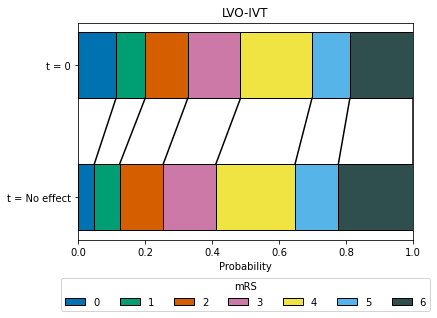

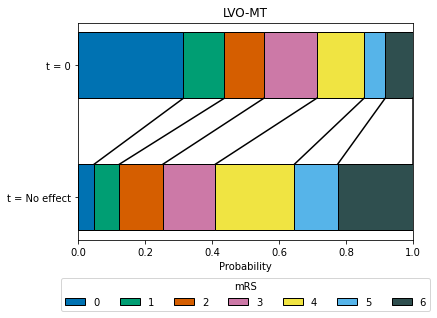

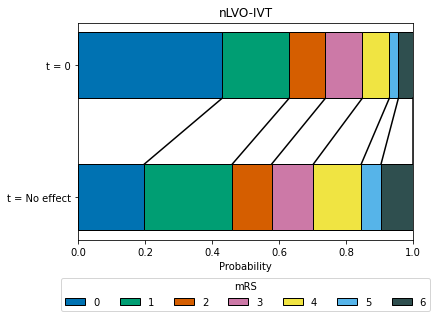

In [29]:
plot_info = [
    [all_distributions_bins_df.loc['no_effect_lvo_ivt_deaths'], 
     all_distributions_bins_df.loc['t0_treatment_lvo_ivt'], 'LVO-IVT'],
    [all_distributions_bins_df.loc['no_effect_lvo_mt_deaths'], 
     all_distributions_bins_df.loc['t0_treatment_lvo_mt'], 'LVO-MT'],
    [all_distributions_bins_df.loc['no_effect_nlvo_ivt_deaths'], 
     all_distributions_bins_df.loc['t0_treatment_nlvo_ivt'], 'nLVO-IVT']]

for info in plot_info:
    
    # Draw no effect distribution
    draw_horizontal_bar(info[0], 't = No effect')
    
    # Add legend now to prevent doubling all the labels:
    plt.legend(loc='center',ncol=7, title='mRS', 
               bbox_to_anchor=[0.5,0.0,0.0,-0.5])   # Legend below axis.
    
    # Draww t=0 distribution
    draw_horizontal_bar(info[1], 't = 0')
    
    # Darw connecting lines
    draw_connections(info[1], info[0])
    
    # Add general content
    label = info[2]
    plt.xlabel('Probability')
    plt.title(label)
    plt.xlim(0,1)
    plt.savefig(f'./images/{label}.jpg', dpi=300, bbox_inches='tight', 
        pad_inches=0.2)
    plt.show()

## References

de la Ossa Herrero N, Carrera D, Gorchs M, Querol M, Millán M, Gomis M, et al. Design and Validation of a Prehospital Stroke Scale to Predict Large Arterial Occlusion The Rapid Arterial Occlusion Evaluation Scale. Stroke; a journal of cerebral circulation. 2013 Nov 26;45. 

Emberson J, Lees KR, Lyden P, et al. _Effect of treatment delay, age, and stroke severity on the effects of intravenous thrombolysis with alteplase for acute ischaemic stroke: A meta-analysis of individual patient data from randomised trials._ The Lancet 2014;384:1929–35. doi:10.1016/S0140-6736(14)60584-5

Fransen, P., Berkhemer, O., Lingsma, H. et al. Time to Reperfusion and Treatment Effect for Acute Ischemic Stroke: A Randomized Clinical Trial. JAMA Neurol. 2016 Feb 1;73(2):190–6. DOI: 10.1001/jamaneurol.2015.3886

Goyal M, Menon BK, van Zwam WH, et al. _Endovascular thrombectomy after large-vessel ischaemic stroke: a meta-analysis of individual patient data from five randomised trials._ The Lancet 2016;387:1723-1731. doi:10.1016/S0140-6736(16)00163-X

Hui W, Wu C, Zhao W, Sun H, Hao J, Liang H, et al. Efficacy and Safety of Recanalization Therapy for Acute Ischemic Stroke With Large Vessel Occlusion. Stroke. 2020 Jul;51(7):2026–35. 

IST-3 collaborative group, Sandercock P, Wardlaw JM, Lindley RI, Dennis M, Cohen G, et al. The benefits and harms of intravenous thrombolysis with recombinant tissue plasminogen activator within 6 h of acute ischaemic stroke (the third international stroke trial [IST-3]): a randomised controlled trial. Lancet. 2012 379:2352-63.

Lees KR, Bluhmki E, von Kummer R, et al. _Time to treatment with intravenous alteplase and outcome in stroke: an updated pooled analysis of ECASS, ATLANTIS, NINDS, and EPITHET trials_. The Lancet 2010;375:1695-703. doi:10.1016/S0140-6736(10)60491-6

McMeekin P, White P, James MA, Price CI, Flynn D, Ford GA. Estimating the number of UK stroke patients eligible for endovascular thrombectomy. European Stroke Journal. 2017;2:319–26. 

SAMueL-1 data on mRS before stroke (DOI: 10.5281/zenodo.6896710): https://samuel-book.github.io/samuel-1/descriptive_stats/08_prestroke_mrs.html

## Appendix

### 1. Excess deaths due to treatment

#### IVT deaths due to fatal intracranial haemorrhage (Emberson et al., 2014): 

| NIHSS | Treated | Control | Excess |
|-------|---------|---------|--------|
| 0-10  | 1.41%   | 0.32%   | 1.10%  |
| 11+   | 3.85%   | 0.45%   | 3.41%  |
| All   | 2.68%   | 0.39%   | 2.29%  |

Excess deaths due to IVT are assumed to occur independently of time. Differing risks of death are applied according to whether the patient is assumed nLVO (NIHSS 0-10 as a surrogate for nLVO) or LVO (NIHSS 11+, as a surrogate for LVO). Note: Rounding errors exist in the "Excess" column.

We use Embersons 2.29% excess deaths from IVT on all patients (nLVO and LVO) with the combined nLVO/LVO population from Lees et al. 2010. From the available trial data, we assume that the split between nLVO/LVO is as near the same in both Lees and Emberson:
* Lees has 3670 patients, they provide a granular level of mRS distribution for their population (combined nLVO/LVO) but they do not provide the proportions of the split.
* Emberson has 6756 patients (they have the 3035 patients from IST-3 in addition to those in Lees, with 51 unaccounted for), they provide the excess deaths by stroke severity. To obtain their value of 2.29% excess deaths from IVT for all patients, this requires a weighting of 48.27% nLVO and 51.73% LVO.
* IST-3 has 3035 patients and provide proportion of patients by stroke severity: 48.24% nLVO and 51.76% LVO. This is as near as the same that we have calculated in Emberson. 
* Assuming that Lees contains the other patients in Emberson (those not from IST-3), then it is a fair assumption that Lees has the same split (nLVO/LVO) of patients as Emberson, and so can use 2.29% excess deaths from IVT for Lees combined nLVO/LVO population.

#### MT deaths (Goyal et al., 2016):

| Treated | Control | Excess |
|---------|---------|--------|
| 18.9%   | 15.3%   | 3.6%   |

The control group in Goyal et al. do not receive MT, but do receive other interventions such as IVT (used in 83% of patients). No additional IVT-related deaths need to be considered when modelling use of MT as the control group (used to estimate the effect of MT at a time MT is no longer effective) already includes IVT-related excess deaths.